In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [25]:
tst_sets = ["19SC1", "19SC2", "08SC"]
data = {
    s: pd.read_excel("../data/anova.xlsx", sheet_name=s).rename(columns={'R2': 'R$^2$'})
    for s in tst_sets
}

In [26]:
def viz_dist(d):
    models = ["XGBoost", "GCN", "GAT", "GATv2", "AttentiveFP", "LightGBM", "1dCNN"]
    fig, axs = plt.subplots(ncols=2, nrows=len(models), figsize=(10, 13))

    for idx, m in enumerate(models):
        md = d[d["Model"] == m] 

        sns.histplot(md, x="RMSE", bins=20, ax=axs[idx][0], kde=True)
        axs[idx][0].set_title(f"{m} RMSE")
        axs[idx][0].grid(False)
        
        sns.histplot(md, x="R$^2$", bins=20, ax=axs[idx][1], kde=True)
        axs[idx][1].set_title(f"{m} R$^2$")
        axs[idx][1].grid(False)
    
    plt.tight_layout()

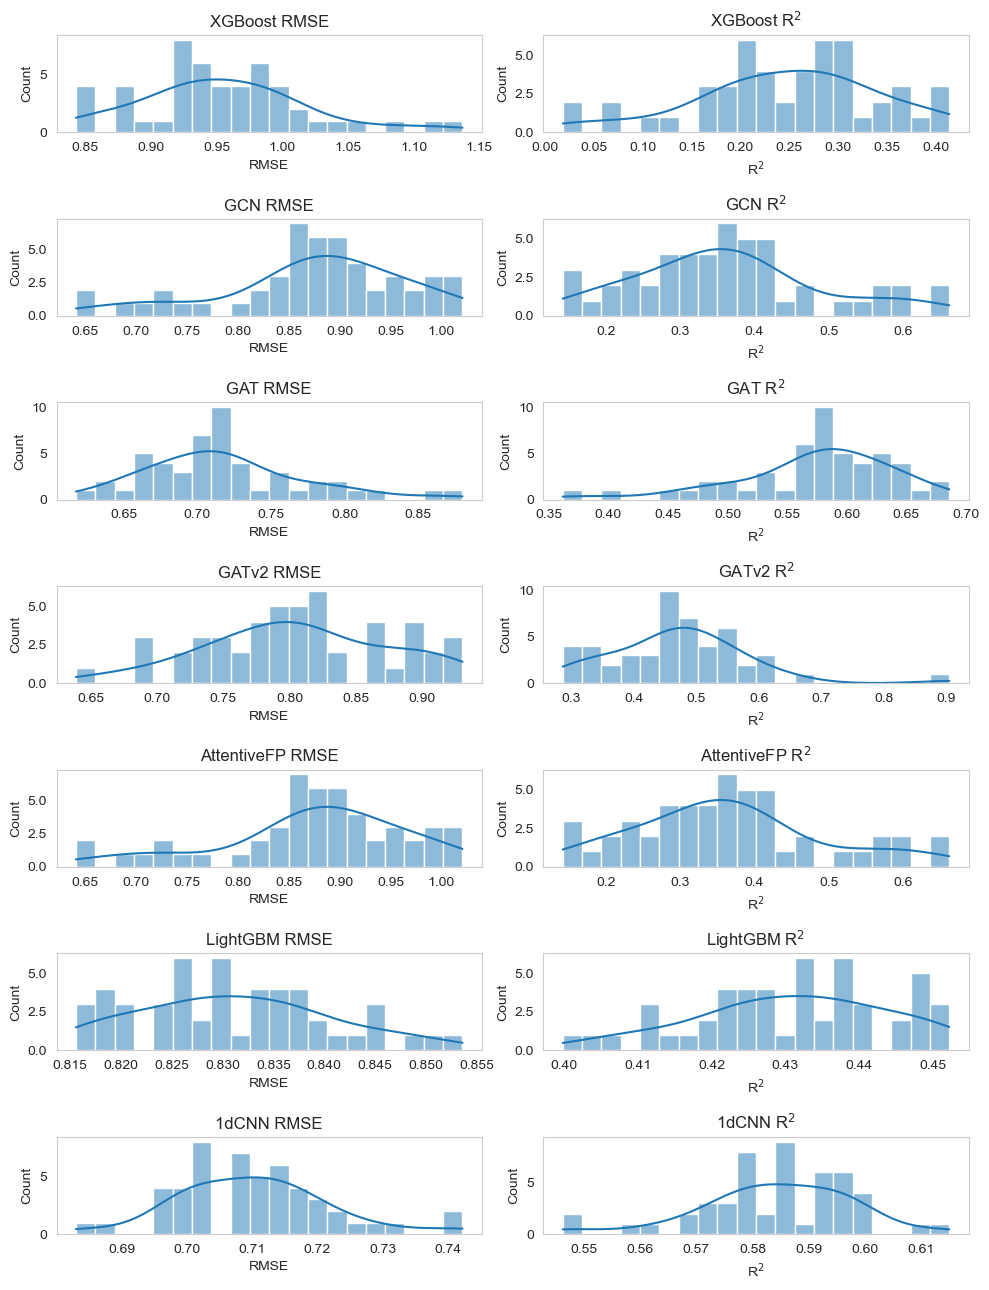

In [27]:
viz_dist(data["19SC1"])

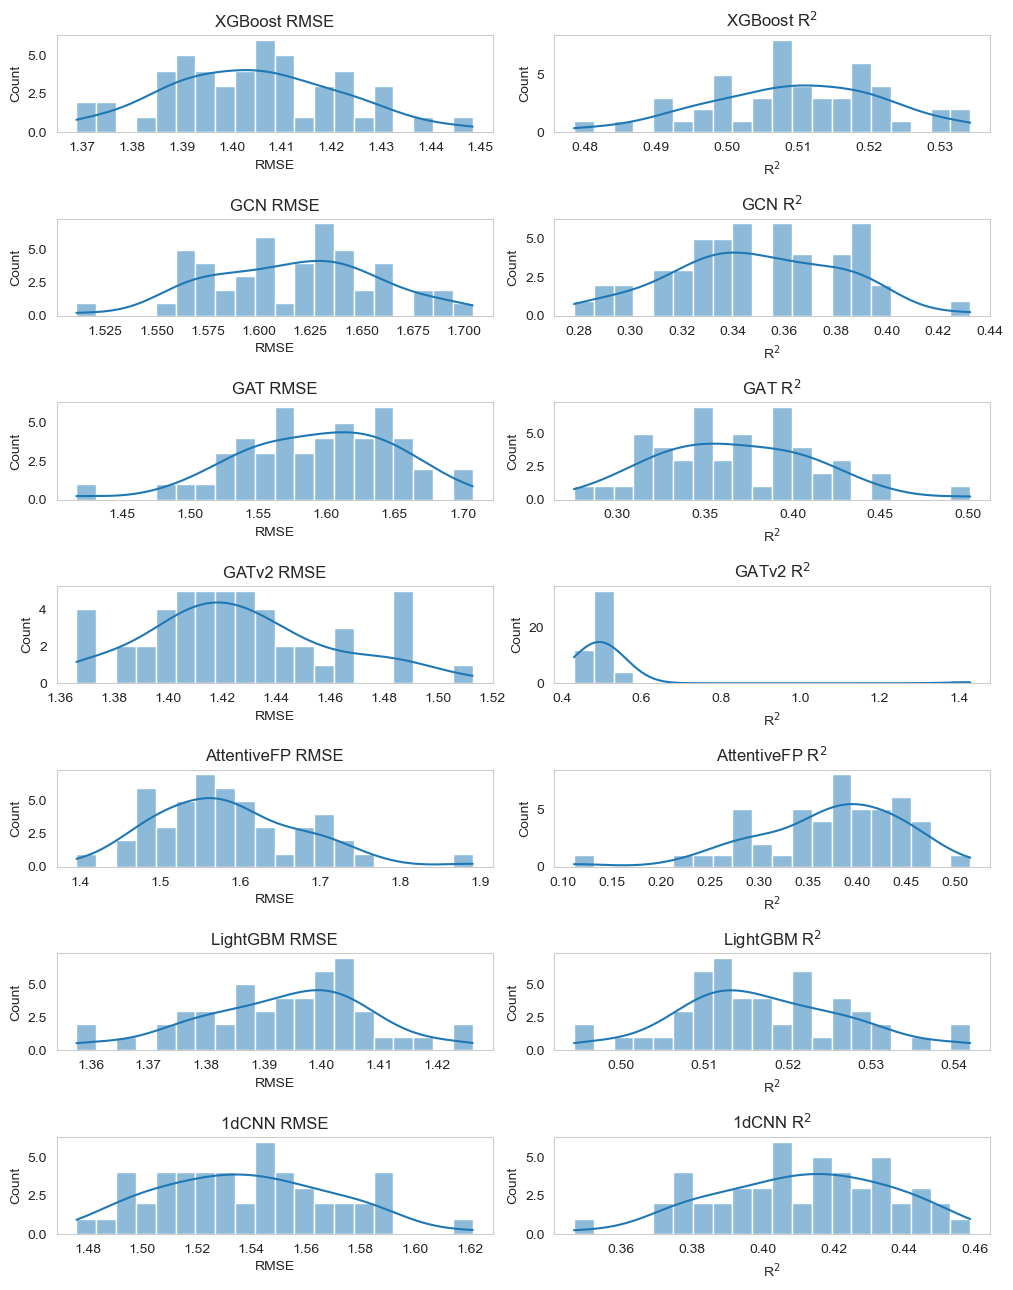

In [28]:
viz_dist(data["19SC2"])

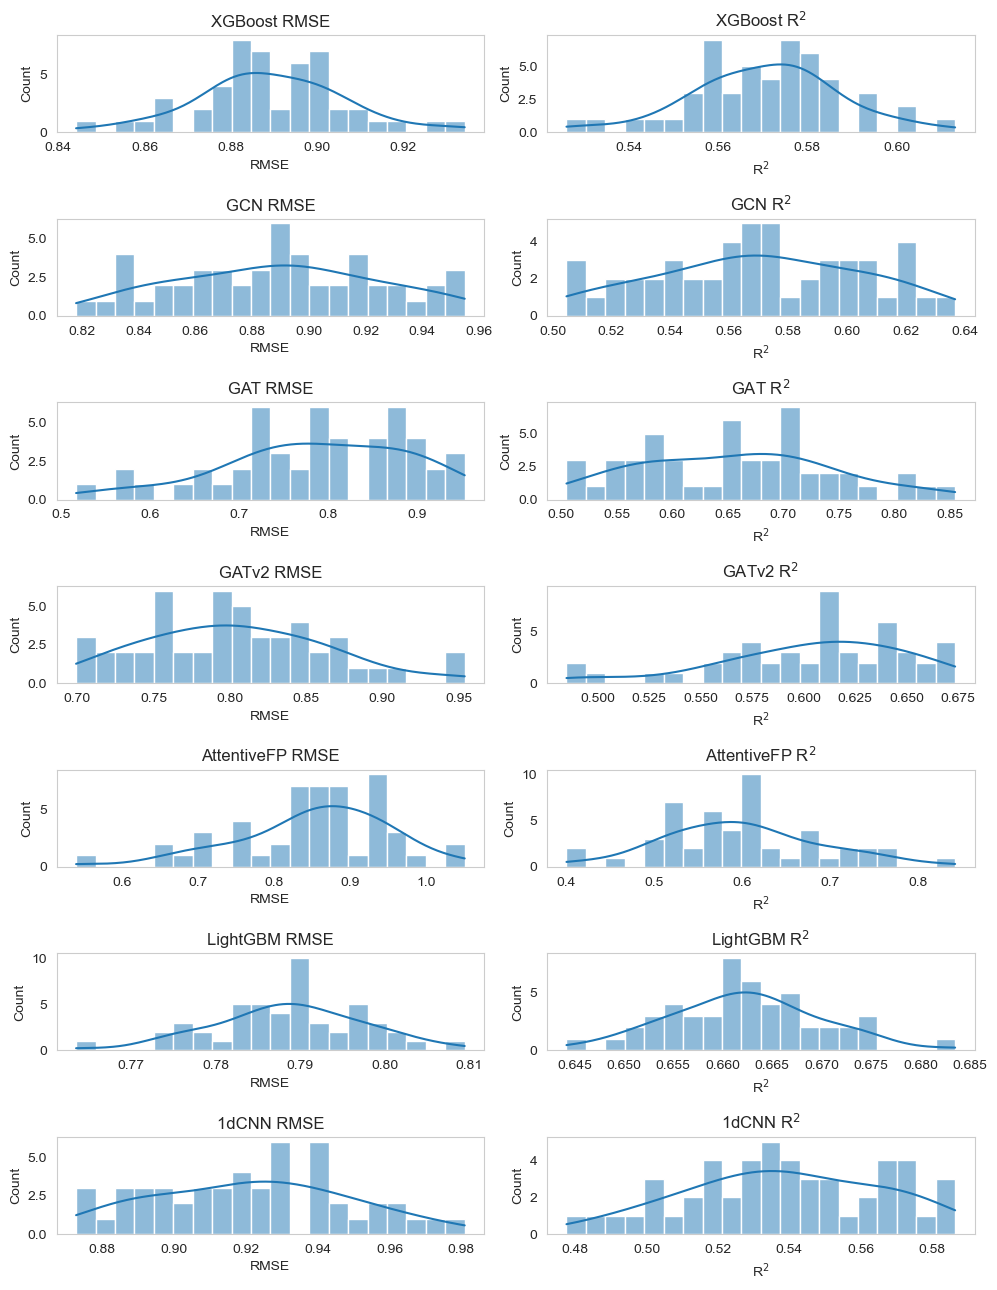

In [29]:
viz_dist(data["08SC"])

In [30]:
data = pd.read_csv("../data/T2.csv")

In [31]:
def create_heatmap_with_significance(data, testset, metric, ax):
    data = data[data["Test Set"] == testset]
    metric_data = data[data['Metric'] == metric]

    # Get unique methods
    methods = sorted(set(metric_data['Method 1']).union(set(metric_data['Method 2'])))

    heatmap_matrix = np.full((len(methods), len(methods)), np.nan)
    annotations = np.empty((len(methods), len(methods)), dtype=object)

    for i, method1 in enumerate(methods):
        for j, method2 in enumerate(methods):
            if method1 != method2:
                filtered_data = metric_data[(metric_data['Method 1'] == method1) & (metric_data['Method 2'] == method2)]
                if not filtered_data.empty:
                    p_value = filtered_data['p'].values[0]
                    significance = filtered_data['Significance'].values[0]
                    heatmap_matrix[i, j] = p_value
                    if p_value < 0.001:
                        annotations[i, j] = f'{p_value:.1e}\n{significance}' if not pd.isna(
                            significance) else f'{p_value:.1e}'
                    else:
                        annotations[i, j] = f'{p_value:.3f}\n{significance}' if not pd.isna(
                            significance) else f'{p_value:.3f}'

    sns.heatmap(heatmap_matrix, ax=ax, annot=annotations, fmt="", cmap='Blues_r', xticklabels=methods,
                yticklabels=methods, mask=np.isnan(heatmap_matrix), linewidths=0.5, linecolor='white')
    ax.text(x=0, y=-0.2, s=f"test set: {testset}, metric: {metric}", fontsize=13)

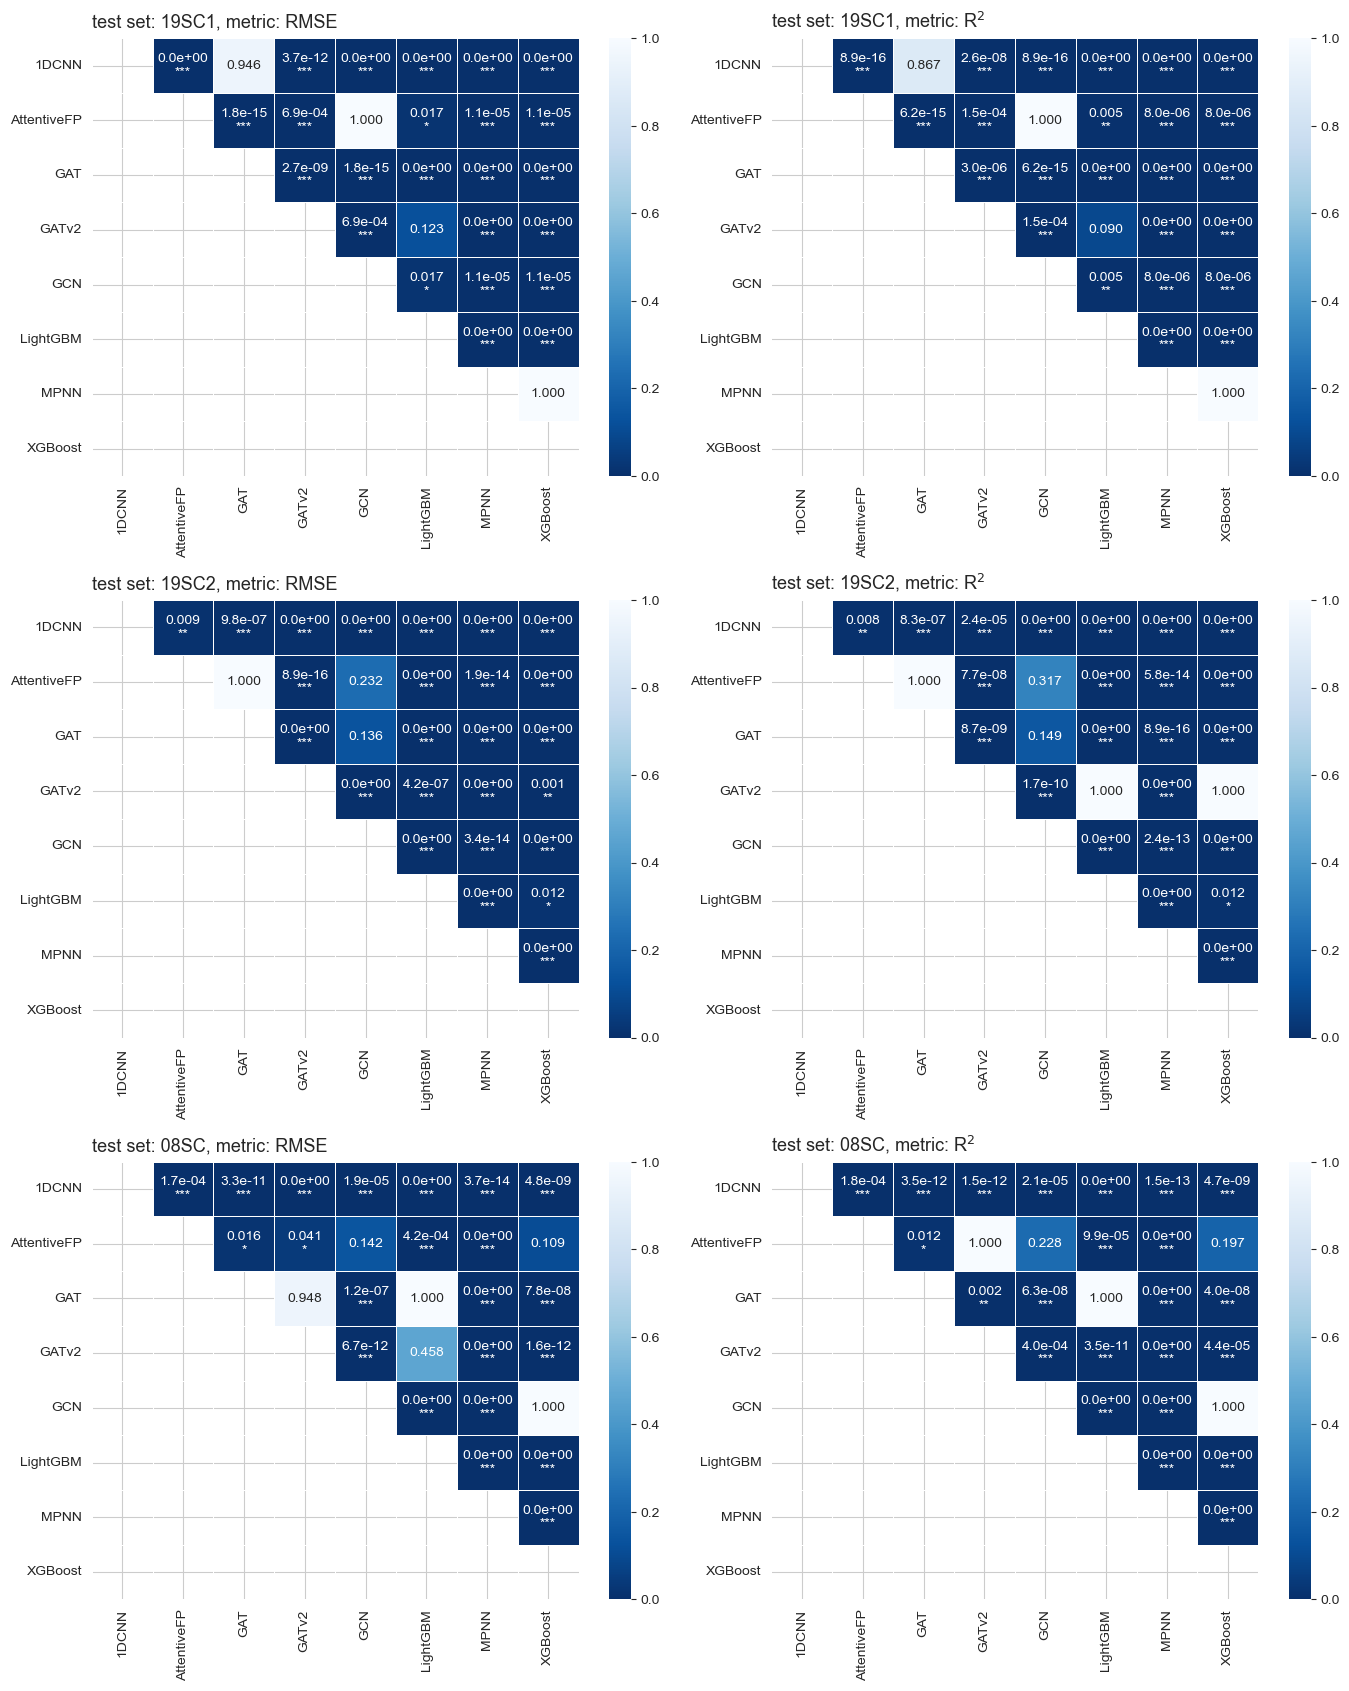

In [32]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(14, 17))
create_heatmap_with_significance(data, "19SC1", 'RMSE', axs[0][0])
create_heatmap_with_significance(data, "19SC1", 'R$^2$', axs[0][1])
create_heatmap_with_significance(data, "19SC2", 'RMSE', axs[1][0])
create_heatmap_with_significance(data, "19SC2", 'R$^2$', axs[1][1])
create_heatmap_with_significance(data, "08SC", 'RMSE', axs[2][0])
create_heatmap_with_significance(data, "08SC", 'R$^2$', axs[2][1])
plt.tight_layout()